In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [285]:
y= pd.read_csv("AAPL_quarterly_financials.csv")

In [286]:
y.index = y.name

In [287]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [288]:
y.index = pd.to_datetime(y.index)

In [289]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [290]:
from pytrends.request import TrendReq

In [291]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Airpods","Profit", "Apple", "Sales","Growth", "Charity","IVE", "G-IDLE","ITZY"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [292]:
df = df.resample("Q").mean()

In [293]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [294]:
from sklearn.preprocessing import StandardScaler

In [295]:
scaler = StandardScaler()

In [296]:
X_scaled = scaler.fit_transform(X)

In [297]:
print(X_scaled.shape)
print(y.shape)

(79, 9)
(79, 1)


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [298]:
from sklearn.linear_model import Lasso

In [299]:
lasso = Lasso(alpha=0.01)

In [310]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.05)

In [311]:
coefficients = lasso.coef_

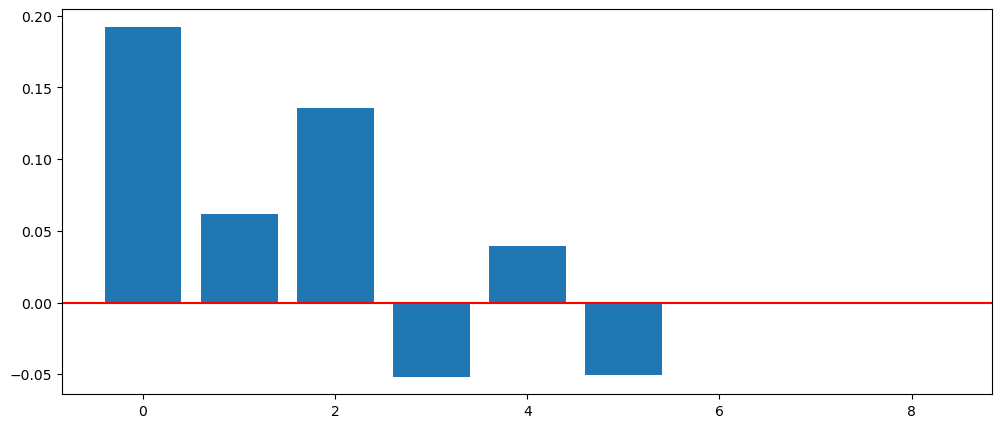

In [312]:
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = "red")
plt.show()

When I initially set alpha to 0.5, the regularization effect was intensified, leading to a scenario where a considerable number of coefficients were shrunk to zero. This action overly simplified our model, as evidenced by the resulting plot where a zero alpha value led to all coefficients being nullified. Such an oversimplified model is overly reductive and inadequate for capturing the subtleties within the dataset.

In essence, while a high regularization factor at an alpha of 0.5 is theoretically sound, it may not yield the most analytically useful model. To address this, I scaled back the alpha value to 0.05, reducing the intensity of regularization. This modification aimed to both confirm the integrity of our code and to allow for a more nuanced and informative model that better reflects the complexity of the data.

# 5.) Do these coefficient magnitudes make sense?


what i expected before 

Relevance to Earnings: Terms directly related to financial performance, such as "Profit," "Apple" , "Sales," and "Growth," are expected to have larger positive coefficients as they are closely tied to earnings.

Irrelevance to Earnings: Terms like "Charity" or names of music groups like "IVE," "G-IDLE," and "ITZY" are less likely to be directly related to earnings and are expected to have coefficients close to zero or that do not significantly contribute to the nowcasting of earnings.

What the coefficient magnitudes shows

Positive Coefficients: The first, second, and fourth bars from the left are positive and relatively large, which suggests that the terms associated with these coefficients have a strong positive relationship with the nowcasting of earnings. If these bars correspond to terms like "Profit," "Apple," "Sales," and "Growth," this would align with the expectation that these terms are relevant to financial performance and hence have a significant positive impact on earnings predictions.

Negative Coefficients: The fifth bar from the left is negative, indicating that the term associated with this coefficient may have a negative relationship with earnings nowcasting.This term is one of the less relevant ones like "Charity"  it might be showing a negative association, although such terms are generally expected to have little or no influence on earnings predictions.

Small or Zero Coefficients: The third and last bars are either very small or close to zero, which indicates that the terms associated with these coefficients might not have a significant relationship with earnings nowcasting.  These terms correspond to "IVE," "G-IDLE," and "ITZY," this would make sense as these terms are not expected to have a strong correlation with a company's financial performance.


